In [1]:
# import libraries
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import inspect
import time

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import src.simulation as s
import src.utils as utils

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

In [2]:
# Read input variables
input_args = utils.load_input_args('../input/simulation.json')

In [3]:
# instantiate simulation class

simulation =  s.Simulation()

/Users/bojansimoski/dev/eur/ABM-PA/src/simulation.py:23: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.PeerNominatedDataPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
<ipython-input-3-82f461c16b09>:3: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  simulation =  s.Simulation()
/Users/bojansimoski/dev/eur/ABM-PA/src/simulation.py:24: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.CommunicationDataPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


## Test Preintervention (REMOVE AFTER IT IS CHECKED)

In [4]:
results_nomm, results_avg_nomm,snapshot_pa = simulation.simulate_preinterventions(700, 'nomination', 0.025,0.007)

In [5]:
snapshot_pa

{1633: 1.3473035830834694,
 1636: 1.30874066595804,
 1637: 1.3464675215988848,
 1733: 1.3460826307500355,
 1639: 1.4203526509584123,
 1640: 0.45860551991998005,
 1641: 1.3336135102958124,
 1642: 1.317839770630832,
 1719: 1.4844997046356878,
 1736: 1.3258510056951949,
 1645: 1.3550355002352394,
 4364: 1.3399071109418903,
 1651: 1.3178590457926693,
 1653: 1.365661552279575,
 1717: 1.4889972887038916,
 1654: 1.3042833811212455,
 1656: 1.3051507896984196,
 1723: 1.576764546313768,
 1605: 1.4699782937463335,
 1606: 1.4685197027174521,
 1607: 1.474846068621535,
 1608: 1.4607822874864984,
 1609: 1.4743124321900247,
 1610: 1.486938591847125,
 1611: 1.4782061149487258,
 1612: 1.5173676927862545,
 1614: 1.462004211295003,
 1615: 1.4875586270129133,
 1617: 1.459873138703386,
 1620: 1.5089107527399859,
 1623: 1.470961009876121,
 1625: 1.4893758770875325,
 1626: 1.4510212701220835,
 1627: 1.4639326322515973,
 1630: 1.5118124462401512,
 1631: 1.4956969038492633,
 1632: 1.4499689497901709,
 6030: 1.5

In [6]:
results_nomm, results_avg_nomm, agents_per_intervention_nomm = simulation.simulate_interventions(700, 'nomination',snapshot_pa, 0.025,0.007)

PRE SNAPSHOT [(1605, 1.3905338395392193), (1606, 2.0145816617918886), (1617, 1.390573496265295), (1607, 1.6390533555373747), (1608, 1.6813741540411737), (1609, 0.8091984833982865), (1610, 1.9693508436001823), (1611, 0.8460136110441898), (1612, 2.023818887469211), (1614, 0.9961568900448236), (1615, 0.7456868872083771), (1620, 1.4279918286103557), (1623, 0.9090079741436143), (1625, 2.630965706725078), (1626, 1.3725340840504818), (1627, 0.9768138293702587), (1630, 1.960540066145664), (1631, 1.6045420744699124), (1632, 1.7416259766719744), (5452, 1.025772773181563), (5458, 2.0515122710785034), (5463, 1.628431793102537), (5451, 1.8418285209962793), (5471, 2.1077138035708862), (5474, 1.639841776114972), (5475, 0.6306807134805184), (1633, 1.6061943549950373), (1636, 0.5588023061189364), (1641, 1.5357540488309183), (1645, 1.2210760284875706), (1639, 2.018256330215015), (1653, 1.5944414740968826), (1717, 1.7500932572391459), (1723, 1.8146040520229823), (1637, 2.7372961346320643), (1640, 0.45860

# Simulation Interventions

## 1. Nomination network

In [10]:
# Read tuned parameter combinations (See tuning_nom_network.ipynb)
pars_nomination = pd.read_csv('../output/opt_pars_nomination.csv', sep=',', header=0)
pars_nomination

,threshold,ipa,error
0,0.025,0.007,0.462071
1,0.025,0.004,0.471020
2,0.025,0.005,0.471045
3,0.025,0.006,0.471688
4,0.025,0.009,0.472211
...,...,...,...
95,0.950,0.005,0.682455
96,1.000,0.045,0.682522
97,1.000,0.038,0.682627
98,1.000,0.042,0.682804


In [11]:
# Run simulations for each parameter combination
list_results_nomm = []
list_results_avg_nomm = []
list_agents_per_intervention_nomm = []
start_whole = time.time()
count = 0
for index, row in pars_nomination.iterrows():
    results_nomm, results_avg_nomm, agents_per_intervention_nomm = simulation.simulate_interventions(700,
                                                                                                     'nomination',
                                                                                                     row['threshold'],
                                                                                                     row['ipa'])
    list_results_nomm.append(results_nomm)
    list_results_avg_nomm.append(results_avg_nomm)
    list_agents_per_intervention_nomm.append(agents_per_intervention_nomm)
    end = time.time()
    print(count, row['threshold'], row['ipa'], "Time elapsed:", end - start_whole, ' seconds')
    count = count + 1


0 0.025 0.006999999999999999 Time elapsed: 26.511702060699463  seconds
1 0.025 0.004 Time elapsed: 53.52610802650452  seconds
2 0.025 0.005 Time elapsed: 78.22037601470947  seconds
3 0.025 0.006 Time elapsed: 102.6838948726654  seconds
4 0.025 0.009000000000000001 Time elapsed: 127.2837119102478  seconds
5 0.025 0.003 Time elapsed: 151.8672070503235  seconds
6 0.025 0.008 Time elapsed: 176.5258710384369  seconds
7 0.025 0.012 Time elapsed: 201.05150294303894  seconds
8 0.025 0.010000000000000002 Time elapsed: 225.51351594924927  seconds
9 0.025 0.011000000000000001 Time elapsed: 250.11676907539368  seconds
10 0.025 0.002 Time elapsed: 274.52304196357727  seconds
11 0.025 0.013 Time elapsed: 298.9305799007416  seconds
12 0.025 0.014000000000000002 Time elapsed: 323.62656927108765  seconds
13 0.025 0.015 Time elapsed: 348.0186381340027  seconds
14 0.05 0.001 Time elapsed: 372.5630900859833  seconds
15 0.025 0.001 Time elapsed: 397.26341223716736  seconds
16 0.07500000000000001 0.001 Time

## 2. Communication network


In [12]:
# Read tuned parameter combinations (See tuning_com_network.ipynb)
pars_communication = pd.read_csv('../output/opt_pars_communication.csv', sep=',', header=0, encoding='latin-1')
pars_communication

,threshold,ipa,error
0,1.000,0.001,0.675750
1,0.975,0.001,0.683444
2,0.950,0.001,0.691740
3,0.925,0.001,0.700577
4,0.900,0.001,0.709325
...,...,...,...
95,0.950,0.013,0.744159
96,0.975,0.032,0.744769
97,0.950,0.018,0.744785
98,1.000,0.048,0.745074


In [13]:
# Run simulations for each parameter combination
list_results_comm = []
list_results_avg_comm = []
list_agents_per_intervention_comm = []
start_whole = time.time()
count = 0
for index, row in pars_communication.iterrows():
    results_comm, results_avg_comm, agents_per_intervention_comm = simulation.simulate_interventions(700,'communication',row['threshold'],row['ipa'])
    list_results_comm.append(results_comm)
    list_results_avg_comm.append(results_avg_comm)
    list_agents_per_intervention_comm.append(agents_per_intervention_comm)
    end = time.time()
    print(count, row['threshold'], row['ipa'], "Time elapsed:", end - start_whole, ' seconds')
    count = count + 1


0 1.0 0.001 Time elapsed: 22.381237983703613  seconds
1 0.975 0.001 Time elapsed: 44.819446086883545  seconds
2 0.95 0.001 Time elapsed: 67.28499698638916  seconds
3 0.925 0.001 Time elapsed: 89.78221487998962  seconds
4 0.9 0.001 Time elapsed: 112.27645182609558  seconds
5 1.0 0.002 Time elapsed: 134.6650800704956  seconds
6 1.0 0.003 Time elapsed: 157.01432299613953  seconds
7 1.0 0.004 Time elapsed: 179.42805314064026  seconds
8 1.0 0.006 Time elapsed: 201.76023817062378  seconds
9 0.8750000000000001 0.001 Time elapsed: 224.112811088562  seconds
10 1.0 0.005 Time elapsed: 246.40705108642578  seconds
11 1.0 0.011000000000000001 Time elapsed: 268.8203468322754  seconds
12 1.0 0.010000000000000002 Time elapsed: 291.17267417907715  seconds
13 1.0 0.008 Time elapsed: 313.6471428871155  seconds
14 1.0 0.009000000000000001 Time elapsed: 336.59279799461365  seconds
15 1.0 0.006999999999999999 Time elapsed: 359.03568482398987  seconds
16 1.0 0.013 Time elapsed: 381.39739298820496  seconds
17

# Postprocessing output

In [14]:
# Step1: create a list per run of overall mean PAL

# Nomination network
list_results_mean_nom = []
for run in range(len(list_results_avg_nomm)):
    # per run mean of all classes
    all_averaged = {}
    for i in input_args['intervention_strategy']:
        temp_res = pd.Series([], dtype = float)
        counter = 0
        for class_id,res in list_results_avg_nomm[run].items():
            temp_res = temp_res.add(list_results_avg_nomm[run][class_id][i],fill_value=0)
            counter = counter + 1
        all_averaged[i] = temp_res/counter

    list_results_mean_nom.append(all_averaged)



# Communication network
list_results_mean_com = []
for run in range(len(list_results_avg_comm)):
    # per run mean of all classes
    all_averaged = {}
    for i in input_args['intervention_strategy']:
        temp_res = pd.Series([], dtype = float)
        counter = 0
        for class_id,res in list_results_avg_comm[run].items():
            temp_res = temp_res.add(list_results_avg_comm[run][class_id][i],fill_value=0)
            counter = counter + 1
        all_averaged[i] = temp_res/counter

    list_results_mean_com.append(all_averaged)


In [15]:
# Step2: Creat per intervention a list of 100

# Nomination network
out_indegree_nom = []
out_betweenness_nom = []
out_closeness_nom = []

for run in range(len(list_results_mean_nom)):
    # per run
    temp1 = list_results_mean_nom[run]
    out_indegree_nom.append(temp1['indegree'])
    out_betweenness_nom.append(temp1['betweenness'])
    out_closeness_nom.append(temp1['closeness'])


# Comunication network
out_indegree_com = []
out_betweenness_com = []
out_closeness_com = []

for run in range(len(list_results_mean_com)):
    # per run
    temp1 = list_results_mean_com[run]
    out_indegree_com.append(temp1['indegree'])
    out_betweenness_com.append(temp1['betweenness'])
    out_closeness_com.append(temp1['closeness'])


In [16]:
# Step3: calculate mean and percentiles

# list into dataframe

# Nomination network
results_nom_indegree = pd.concat(out_indegree_nom, axis=1, keys=[s.name for s in out_indegree_nom])
results_nom_betweenness = pd.concat(out_betweenness_nom, axis=1, keys=[s.name for s in out_betweenness_nom])
results_nom_closeness = pd.concat(out_closeness_nom, axis=1, keys=[s.name for s in out_closeness_nom])

# indegree
i_nom = results_nom_indegree.mean(axis=1)
i_nom_min = results_nom_indegree.quantile(q=0.025, axis=1)
i_nom_max = results_nom_indegree.quantile(q=0.975, axis=1)

# betweenness
b_nom = results_nom_betweenness.mean(axis=1)
b_nom_min = results_nom_betweenness.quantile(q=0.025, axis=1)
b_nom_max = results_nom_betweenness.quantile(q=0.975, axis=1)

# closeness
c_nom = results_nom_closeness.mean(axis=1)
c_nom_min = results_nom_closeness.quantile(q=0.025, axis=1)
c_nom_max = results_nom_closeness.quantile(q=0.975, axis=1)


# Comunication network
results_com_indegree = pd.concat(out_indegree_com, axis=1, keys=[s.name for s in out_indegree_com])
results_com_betweenness = pd.concat(out_betweenness_com, axis=1, keys=[s.name for s in out_betweenness_com])
results_com_closeness = pd.concat(out_closeness_com, axis=1, keys=[s.name for s in out_closeness_com])

# indegree
i_com = results_com_indegree.mean(axis=1)
i_com_min = results_com_indegree.quantile(q=0.025, axis=1)
i_com_max = results_com_indegree.quantile(q=0.975, axis=1)

# betweenness
b_com = results_com_betweenness.mean(axis=1)
b_com_min = results_com_betweenness.quantile(q=0.025, axis=1)
b_com_max = results_com_betweenness.quantile(q=0.975, axis=1)

# closeness
c_com = results_com_closeness.mean(axis=1)
c_com_min = results_com_closeness.quantile(q=0.025, axis=1)
c_com_max = results_com_closeness.quantile(q=0.975, axis=1)

In [17]:
# Success rate (only mean)

# Nomination network
i_nom_sr = (i_nom/i_nom[0] -1) *100
i_nom_sr_min = (i_nom_min/i_nom_min[0] -1) *100
i_nom_sr_max = (i_nom_max/i_nom_max[0] -1) *100
b_nom_sr = (b_nom/b_nom[0] -1) *100
b_nom_sr_min = (b_nom_min/b_nom_min[0] -1) *100
b_nom_sr_max = (b_nom_max/b_nom_max[0] -1) *100
c_nom_sr = (c_nom/c_nom[0] -1) *100
c_nom_sr_min = (c_nom_min/c_nom_min[0] -1) *100
c_nom_sr_max = (c_nom_max/c_nom_max[0] -1) *100

# Communication network
i_com_sr = (i_com/i_com[0] -1) *100
i_com_sr_min = (i_com_min/i_com_min[0] -1) *100
i_com_sr_max = (i_com_max/i_com_max[0] -1) *100
b_com_sr = (b_com/b_com[0] -1) *100
b_com_sr_min = (b_com_min/b_com_min[0] -1) *100
b_com_sr_max = (b_com_max/b_com_max[0] -1) *100
c_com_sr = (c_com/c_com[0] -1) *100
c_com_sr_min = (c_com_min/c_com_min[0] -1) *100
c_com_sr_max = (c_com_max/c_com_max[0] -1) *100

In [18]:
# confidence intervals at day 700
print('nom i:', i_nom_sr[699], 'b:', b_nom_sr[699], 'c: ', c_nom_sr[699])
print('nom min i:', i_nom_sr_min[699], 'b:', b_nom_sr_min[699], 'c: ', c_nom_sr_min[699])
print('nom max i:', i_nom_sr_max[699], 'b:', b_nom_sr_max[699], 'c: ', c_nom_sr_max[699])

print('com i:', i_com_sr[699], 'b:', b_com_sr[699], 'c: ', c_com_sr[699])
print('com min i:', i_com_sr_min[699], 'b:', b_com_sr_min[699], 'c: ', c_com_sr_min[699])
print('com max i:', i_com_sr_max[699], 'b:', b_com_sr_max[699], 'c: ', c_com_sr_max[699])

nom i: 6.887428739890855 b: 6.381933024203712 c:  7.00542722104156
nom min i: 3.243980271800484 b: 2.5021604817849763 c:  3.7307486546552804
nom max i: 8.436829934755274 b: 7.395782419539376 c:  8.667219778387025
com i: 8.03268865367155 b: 8.016044851911763 c:  8.012089610026173
com min i: 7.236467398007296 b: 7.245036613936429 c:  7.239217051780389
com max i: 8.427902504532847 b: 8.35344883186786 c:  8.385109250529887


In [19]:
c_com_sr

0      0.000000
1      0.270995
2      0.537930
3      0.810417
4      1.074172
         ...   
695    8.010883
696    8.011190
697    8.011490
698    8.011800
699    8.012090
Length: 700, dtype: float64

# Ploting the outcomes

## 1. PAL

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


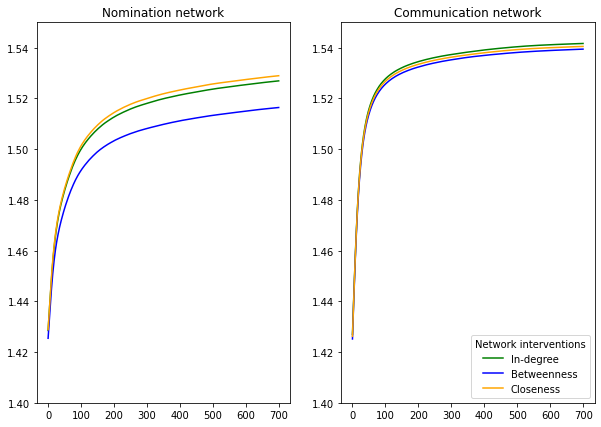

In [20]:
# Plots (with confidence intervals)
ticks = np.arange(1.40, 1.60, 0.01)
x = np.arange(0,700,1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

ax1.set_title('Nomination network')
ax1.set_ylim([1.4, 1.55])
ax1.plot(x, i_nom, color='green')
#plt.fill_between(x, i_nom_min, i_nom_max, alpha=0.2, color='C5')
ax1.plot(x, b_nom, color='blue')
#plt.fill_between(x, b_nom_min, b_nom_max, alpha=0.2, color='C0')
ax1.plot(x, c_nom, color='orange')
#plt.fill_between(x, c_nom_min, c_nom_max, alpha=0.2, color='C3')

ax2.set_title('Communication network')
ax2.set_ylim([1.4, 1.55])
ax2.plot(x, i_com, color='green')
#plt.fill_between(x, i_com_min, i_com_max, alpha=0.2, color='C5')
ax2.plot(x, b_com, color='blue')
#plt.fill_between(x, b_com_min, b_com_max, alpha=0.2, color='C0')
ax2.plot(x, c_com, color='orange')
#plt.fill_between(x, c_com_min, c_com_max, alpha=0.2, color='C3')
ax2.legend(['In-degree', 'Betweenness', 'Closeness'], loc='lower right', title="Network interventions")

fig.savefig('../output/sim_results1.eps', bbox_inches='tight', format='eps', dpi=1000)

## 2. Success rate (used in paper)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


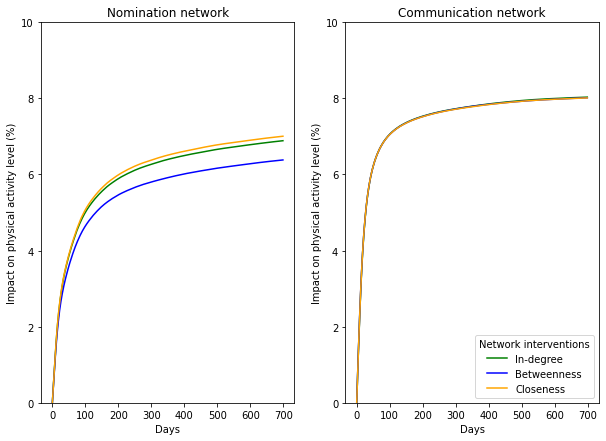

In [21]:
# Plot (without confidence intervals): used in paper
ticks = np.arange(1.40, 1.60, 0.01)
x = np.arange(0,700,1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

ax1.set_title('Nomination network')
ax1.set_xlabel('Days')
ax1.set_ylabel('Impact on physical activity level (%)')
ax1.set_ylim([0, 10])
ax1.plot(x, i_nom_sr, color='green')
ax1.plot(x, b_nom_sr, color='blue')
ax1.plot(x, c_nom_sr, color='orange')

ax2.set_title('Communication network')
ax2.set_xlabel('Days')
ax2.set_ylabel('Impact on physical activity level (%)')
ax2.set_ylim([0, 10])
ax2.plot(x, i_com_sr, color='green')
ax2.plot(x, b_com_sr, color='blue')
ax2.plot(x, c_com_sr, color='orange')
ax2.legend(['In-degree', 'Betweenness', 'Closeness'], loc='lower right', title="Network interventions")

fig.savefig('../output/sim_results2.eps', bbox_inches='tight', format='eps', dpi=1000)


## 3. Variation at day 700

In [22]:
nom_var = {'In-degree': (results_nom_indegree.iloc[699]/results_nom_indegree.iloc[0] -1) *100,
           'Betweenness': (results_nom_betweenness.iloc[699]/results_nom_betweenness.iloc[0] -1) *100,
           'Closeness': (results_nom_closeness.iloc[699]/results_nom_closeness.iloc[0] -1) *100}

com_var = {'In-degree': (results_com_indegree.iloc[699]/results_com_indegree.iloc[0] -1) *100,
           'Betweenness': (results_com_betweenness.iloc[699]/results_com_betweenness.iloc[0] -1) *100,
           'Closeness': (results_com_closeness.iloc[699]/results_com_closeness.iloc[0] -1) *100}


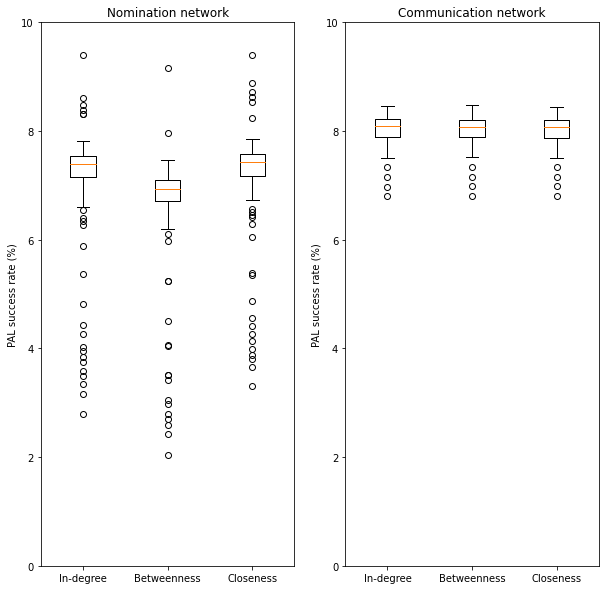

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.set_title('Nomination network')
ax1.set_ylabel('PAL success rate (%)')
ax1.set_ylim([0, 10])
ax1.boxplot(nom_var.values())
ax1.set_xticklabels(nom_var.keys())


ax2.set_title('Communication network')
ax2.set_ylabel('PAL success rate (%)')
ax2.set_ylim([0, 10])
ax2.boxplot(com_var.values())
ax2.set_xticklabels(com_var.keys())
#ax2.legend(['In-degree', 'Betweenness', 'Closeness'], loc='lower right', title="Network interventions")

fig.savefig('../output/sim_results3.eps', bbox_inches='tight', format='eps', dpi=1000)


## 4. Variation between classes (used in paper)

In [24]:
# Nomination network
all_averaged_nomm = {}
for class_id in input_args['classes']:
    all_averaged_nomm[str(class_id)] = {}
    for i in  ['betweenness','closeness','indegree']:
        temp_res = pd.Series([], dtype = float)
        count_res = 0
        for res_avg in list_results_avg_nomm:
            temp_res = temp_res.add(res_avg[str(class_id)][i],fill_value=0)
            count_res = count_res + 1
        all_averaged_nomm[str(class_id)][i] = temp_res/count_res

# Communication network
all_averaged_comm = {}
for class_id in input_args['classes']:
    all_averaged_comm[str(class_id)] = {}
    for i in  ['betweenness','closeness','indegree']:
        temp_res = pd.Series([], dtype = float)
        count_res = 0
        for res_avg in list_results_avg_comm:
            temp_res = temp_res.add(res_avg[str(class_id)][i],fill_value=0)
            count_res = count_res + 1
        all_averaged_comm[str(class_id)][i] = temp_res/count_res

In [25]:

# Nomination network
class_indegree_nom = []
class_betweenness_nom = []
class_closeness_nom = []

for c in input_args['classes']:
    # per run
    temp1 = all_averaged_nomm[str(c)]
    class_indegree_nom.append(temp1['indegree'])
    class_betweenness_nom.append(temp1['betweenness'])
    class_closeness_nom.append(temp1['closeness'])

# Communication network
class_indegree_com = []
class_betweenness_com = []
class_closeness_com = []

for c in input_args['classes']:
    # per run
    temp1 = all_averaged_comm[str(c)]
    class_indegree_com.append(temp1['indegree'])
    class_betweenness_com.append(temp1['betweenness'])
    class_closeness_com.append(temp1['closeness'])

In [26]:
# Nomination network
pd_class_indegree_nom = pd.concat(class_indegree_nom, axis=1, keys=[s.name for s in class_indegree_nom])
pd_class_betweenness_nom = pd.concat(class_betweenness_nom, axis=1, keys=[s.name for s in class_betweenness_nom])
pd_class_closeness_nom = pd.concat(class_closeness_nom, axis=1, keys=[s.name for s in class_closeness_nom])

# Comunication network
pd_class_indegree_com = pd.concat(class_indegree_com, axis=1, keys=[s.name for s in class_indegree_com])
pd_class_betweenness_com = pd.concat(class_betweenness_com, axis=1, keys=[s.name for s in class_betweenness_com])
pd_class_closeness_com = pd.concat(class_closeness_com, axis=1, keys=[s.name for s in class_closeness_com])


nom_clvar = {'In-degree': (pd_class_indegree_nom.iloc[699]/pd_class_indegree_nom.iloc[0] -1) *100,
           'Betweenness': (pd_class_betweenness_nom.iloc[699]/pd_class_betweenness_nom.iloc[0] -1) *100,
           'Closeness': (pd_class_closeness_nom.iloc[699]/pd_class_closeness_nom.iloc[0] -1) *100}

com_clvar = {'In-degree': (pd_class_indegree_com.iloc[699]/pd_class_indegree_com.iloc[0] -1) *100,
           'Betweenness': (pd_class_betweenness_com.iloc[699]/pd_class_betweenness_com.iloc[0] -1) *100,
           'Closeness': (pd_class_closeness_com.iloc[699]/pd_class_closeness_com.iloc[0] -1) *100}



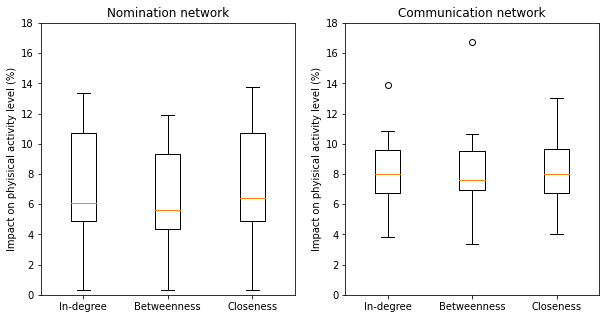

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Nomination network')
ax1.set_ylabel('Impact on phyisical activity level (%)')
ax1.set_ylim([0, 18])
ax1.boxplot(nom_clvar.values())
ax1.set_xticklabels(nom_clvar.keys())


ax2.set_title('Communication network')
ax2.set_ylabel('Impact on phyisical activity level (%)')
ax2.set_ylim([0, 18])
ax2.boxplot(com_clvar.values())
ax2.set_xticklabels(com_clvar.keys())
#ax2.legend(['In-degree', 'Betweenness', 'Closeness'], loc='lower right', title="Network interventions")


fig.savefig('../output/sim_results4.eps', bbox_inches='tight', format='eps', dpi=1000)



In [28]:
i_nom_bp = (pd_class_indegree_nom.iloc[699]/pd_class_indegree_nom.iloc[0] -1) *100
b_nom_bp = (pd_class_betweenness_nom.iloc[699]/pd_class_betweenness_nom.iloc[0] -1) *100
c_nom_bp =  (pd_class_closeness_nom.iloc[699]/pd_class_closeness_nom.iloc[0] -1) *100

i_com_bp = (pd_class_indegree_com.iloc[699]/pd_class_indegree_com.iloc[0] -1) *100
b_com_bp = (pd_class_betweenness_com.iloc[699]/pd_class_betweenness_com.iloc[0] -1) *100
c_com_bp = (pd_class_closeness_com.iloc[699]/pd_class_closeness_com.iloc[0] -1) *100

In [29]:
com_clvar


{'Betweenness': NaN     7.621993
 NaN     7.369291
 NaN    10.628382
 NaN     9.943455
 NaN     5.354492
 NaN     7.514880
 NaN     6.970233
 NaN     3.331968
 NaN     6.612207
 NaN     8.665145
 NaN     4.155965
 NaN     9.533120
 NaN     5.500869
 NaN     8.045051
 NaN    16.714025
 NaN     8.031089
 NaN     9.533485
 NaN    10.043277
 NaN     7.262451
 NaN     7.988974
 NaN     7.279733
 dtype: float64, 'Closeness': NaN     7.621993
 NaN     6.736012
 NaN    11.302869
 NaN     7.999849
 NaN     5.354492
 NaN     7.415050
 NaN     6.970233
 NaN     4.170937
 NaN     6.906339
 NaN    10.481696
 NaN     4.023694
 NaN     9.643477
 NaN     5.500869
 NaN     8.505945
 NaN    13.027510
 NaN     8.640485
 NaN     9.885924
 NaN    10.859243
 NaN     6.349617
 NaN     8.210558
 NaN     7.971481
 dtype: float64, 'In-degree': NaN     7.849834
 NaN     6.736012
 NaN     9.561016
 NaN     8.819963
 NaN     5.354492
 NaN     7.140796
 NaN     6.970233
 NaN     3.835821
 NaN     6.906339
 NaN    1

In [30]:
nom_clvar

{'Betweenness': NaN     0.315972
 NaN    10.126807
 NaN     3.140071
 NaN     4.783857
 NaN     2.614880
 NaN     7.621485
 NaN    11.895609
 NaN     2.800926
 NaN     8.779130
 NaN     5.332593
 NaN     4.355027
 NaN     2.368075
 NaN     5.625901
 NaN     4.694253
 NaN    11.904140
 NaN     9.343764
 NaN     6.257756
 NaN    11.523275
 NaN     5.622173
 NaN     4.726273
 NaN    11.780303
 dtype: float64, 'Closeness': NaN     0.348243
 NaN    10.737845
 NaN     3.140071
 NaN     5.134581
 NaN     2.614880
 NaN     7.090763
 NaN    13.789948
 NaN     3.791601
 NaN     8.625006
 NaN     6.440857
 NaN     4.882662
 NaN     3.265018
 NaN     6.839401
 NaN     5.625947
 NaN    12.180251
 NaN    11.626785
 NaN     7.056034
 NaN    13.115164
 NaN     6.093934
 NaN     4.878565
 NaN    11.246346
 dtype: float64, 'In-degree': NaN     0.348243
 NaN    10.737845
 NaN     3.140071
 NaN     5.134581
 NaN     2.614880
 NaN     7.142449
 NaN    13.357336
 NaN     2.642418
 NaN     8.625006
 NaN     